<a href="https://colab.research.google.com/github/taengbae/DNA/blob/main/%EC%95%84%ED%8C%8C%ED%8A%B8%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

In [ ]:
주택매매가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/주택매매가격지수(KB).csv'
주택전세가격지수 = '/content/drive/MyDrive/Colab Notebooks/data/주택전세가격지수(KB).csv'
출생아수_계 = '/content/drive/MyDrive/Colab Notebooks/data/출생아수_계.csv'
출생아수_남자 = '/content/drive/MyDrive/Colab Notebooks/data/출생아수_남자.csv'
출생아수_여자 = '/content/drive/MyDrive/Colab Notebooks/data/출생아수_여자.csv'

In [ ]:
data_mae = pd.read_csv(주택매매가격지수)
data_jeon = pd.read_csv(주택전세가격지수)
data_baby_t = pd.read_csv(출생아수_계, encoding='cp949')
data_baby_m = pd.read_csv(출생아수_남자, encoding='cp949')
data_baby_w = pd.read_csv(출생아수_여자, encoding='cp949')

In [ ]:
data_baby_t.head()

,시점,서울특별시 계(명)
0,2000. 01,12866
1,2000. 02,11797
2,2000. 03,12453
3,2000. 04,10782
4,2000. 05,10817


In [ ]:
data_baby_m.head()

,시점,서울특별시 남자(명)
0,2000. 01,6738
1,2000. 02,6227
2,2000. 03,6452
3,2000. 04,5662
4,2000. 05,5619


In [ ]:
data_baby_w.head()

,시점,서울특별시 여자(명)
0,2000. 01,6128
1,2000. 02,5570
2,2000. 03,6001
3,2000. 04,5120
4,2000. 05,5198


In [ ]:
data_baby = pd.concat([data_baby_t,data_baby_m['서울특별시 남자(명)'],data_baby_w['서울특별시 여자(명)']], axis=1)
data_baby

,시점,서울특별시 계(명),서울특별시 남자(명),서울특별시 여자(명)
0,2000. 01,12866,6738,6128
1,2000. 02,11797,6227,5570
2,2000. 03,12453,6452,6001
3,2000. 04,10782,5662,5120
4,2000. 05,10817,5619,5198
...,...,...,...,...
235,2019. 08,4330,2211,2119
236,2019. 09,4291,2225,2066
237,2019. 10,4513,2337,2176
238,2019. 11,4170,2128,2042


In [ ]:
#주택매매가격 날짜 변경
data_mae.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
data_mae['날짜'] = pd.to_datetime(data_mae['날짜'])

#주택전세가격 날짜 변경
data_jeon.rename(columns={'Unnamed: 0':'날짜'}, inplace=True)
data_jeon['날짜'] = pd.to_datetime(data_jeon['날짜'])

In [ ]:
#주택매매가격 인덱스 리셋
df_mae = data_mae[data_mae['날짜'] >= '2000-01-01']
df_mae = df_mae[df_mae['날짜'] <= '2019-12-01']
df_mae = df_mae.reset_index()

#주택전세가격 인덱스 리셋
df_jeon = data_jeon[data_jeon['날짜'] >= '2000-01-01']
df_jeon = df_jeon[df_jeon['날짜'] <= '2019-12-01']
df_jeon = df_jeon.reset_index()

In [ ]:
df_jeon

,index,날짜,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,168,2000-01-01,43.519,66.976,48.492,35.801,33.305,39.393
1,169,2000-02-01,44.780,67.873,50.069,37.108,34.753,40.874
2,170,2000-03-01,45.788,69.069,51.597,37.916,35.669,42.042
3,171,2000-04-01,46.376,69.742,52.457,38.476,36.172,42.744
4,172,2000-05-01,46.418,69.742,52.457,38.507,36.290,42.822
...,...,...,...,...,...,...,...,...
235,403,2019-08-01,99.259,100.217,99.841,98.833,99.189,99.757
236,404,2019-09-01,99.245,100.164,99.821,98.832,99.318,99.924
237,405,2019-10-01,99.300,100.170,99.879,98.896,99.554,100.134
238,406,2019-11-01,99.375,100.204,99.920,98.988,99.763,100.319


In [ ]:
df_mae

,index,날짜,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,168,2000-01-01,48.819,72.153,56.103,39.474,31.660,39.451
1,169,2000-02-01,49.027,72.236,56.231,39.783,32.136,39.782
2,170,2000-03-01,49.234,72.319,56.615,40.015,32.433,40.114
3,171,2000-04-01,49.286,72.236,56.679,40.092,32.433,40.238
4,172,2000-05-01,49.234,72.153,56.615,40.015,32.403,40.238
...,...,...,...,...,...,...,...,...
235,403,2019-08-01,99.586,100.753,100.300,99.014,100.229,100.682
236,404,2019-09-01,99.640,100.760,100.424,99.041,100.677,101.060
237,405,2019-10-01,99.733,100.766,100.473,99.152,101.260,101.432
238,406,2019-11-01,99.874,100.869,100.567,99.297,101.830,101.848


In [ ]:
#서울만 추출
df_mae = df_mae[['날짜', '아파트(서울)[2019.01=100]', '총지수(서울)[2019.01=100]']]
df_jeon = df_jeon[['날짜', '아파트(서울)[2019.01=100]', '총지수(서울)[2019.01=100]']]

In [ ]:
df_mae.head()

,날짜,아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,2000-01-01,31.660,39.451
1,2000-02-01,32.136,39.782
2,2000-03-01,32.433,40.114
3,2000-04-01,32.433,40.238
4,2000-05-01,32.403,40.238


In [ ]:
#매매와 출생아수 결합
df1 = pd.concat([df_mae,data_baby['서울특별시 계(명)'],data_baby['서울특별시 남자(명)'],data_baby['서울특별시 여자(명)']], axis=1)
df1

,날짜,아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],서울특별시 계(명),서울특별시 남자(명),서울특별시 여자(명)
0,2000-01-01,31.660,39.451,12866,6738,6128
1,2000-02-01,32.136,39.782,11797,6227,5570
2,2000-03-01,32.433,40.114,12453,6452,6001
3,2000-04-01,32.433,40.238,10782,5662,5120
4,2000-05-01,32.403,40.238,10817,5619,5198
...,...,...,...,...,...,...
235,2019-08-01,100.229,100.682,4330,2211,2119
236,2019-09-01,100.677,101.060,4291,2225,2066
237,2019-10-01,101.260,101.432,4513,2337,2176
238,2019-11-01,101.830,101.848,4170,2128,2042


In [ ]:
#전세와 출생아수 결합
df2 = pd.concat([df_jeon,data_baby['서울특별시 계(명)'],data_baby['서울특별시 남자(명)'],data_baby['서울특별시 여자(명)']], axis=1)
df2.head()

,날짜,아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],서울특별시 계(명),서울특별시 남자(명),서울특별시 여자(명)
0,2000-01-01,33.305,39.393,12866,6738,6128
1,2000-02-01,34.753,40.874,11797,6227,5570
2,2000-03-01,35.669,42.042,12453,6452,6001
3,2000-04-01,36.172,42.744,10782,5662,5120
4,2000-05-01,36.290,42.822,10817,5619,5198


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



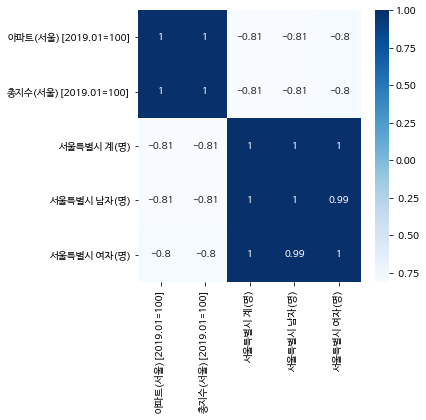

In [ ]:
#매매와 출생아수 상관계수
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

In [ ]:
#매매와 출산율 상관관계
df1.corr(method='pearson')

,아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],서울특별시 계(명),서울특별시 남자(명),서울특별시 여자(명)
아파트(서울)[2019.01=100],1.000000,0.995581,-0.805612,-0.810502,-0.797446
총지수(서울)[2019.01=100],0.995581,1.000000,-0.806244,-0.811717,-0.797437
서울특별시 계(명),-0.805612,-0.806244,1.000000,0.998474,0.998173
서울특별시 남자(명),-0.810502,-0.811717,0.998474,1.000000,0.993313
서울특별시 여자(명),-0.797446,-0.797437,0.998173,0.993313,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



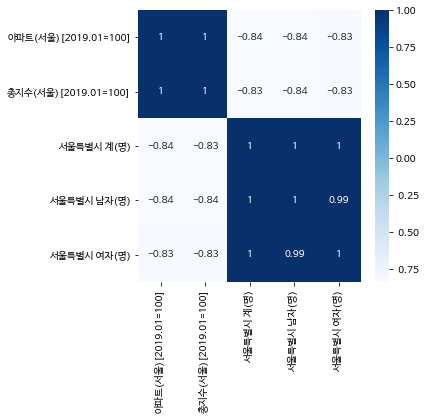

In [ ]:
#전세와 출생아수 상관계수
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), annot=True, cmap='Blues')

In [ ]:
#전세와 출산율 상관관계
df2.corr(method='pearson')

,아파트(서울)[2019.01=100],총지수(서울)[2019.01=100],서울특별시 계(명),서울특별시 남자(명),서울특별시 여자(명)
아파트(서울)[2019.01=100],1.000000,0.998262,-0.837405,-0.839615,-0.832058
총지수(서울)[2019.01=100],0.998262,1.000000,-0.834266,-0.836373,-0.829043
서울특별시 계(명),-0.837405,-0.834266,1.000000,0.998474,0.998173
서울특별시 남자(명),-0.839615,-0.836373,0.998474,1.000000,0.993313
서울특별시 여자(명),-0.832058,-0.829043,0.998173,0.993313,1.000000


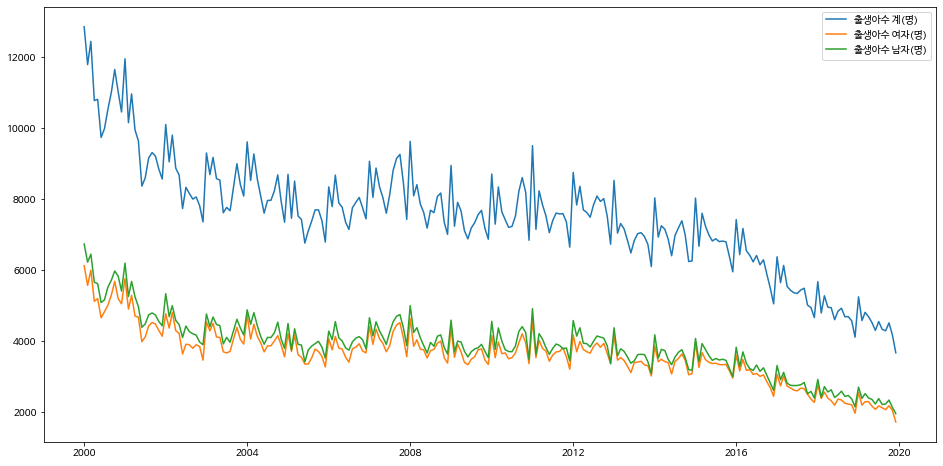

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot()
plt.plot(df1['날짜'], df1['서울특별시 계(명)'],label='출생아수 계(명)')
plt.plot(df1['날짜'], df1['서울특별시 여자(명)'],label='출생아수 여자(명)')
plt.plot(df1['날짜'], df1['서울특별시 남자(명)'],label='출생아수 남자(명)')
ax.legend()
plt.show()

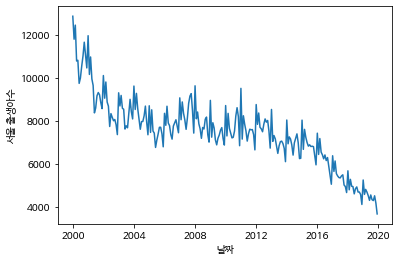

In [ ]:
#날짜별 서울 출생아수
plt.plot(df1['날짜'], df1['서울특별시 계(명)'])
plt.xlabel('날짜')
plt.ylabel('서울 출생아수')
plt.show()

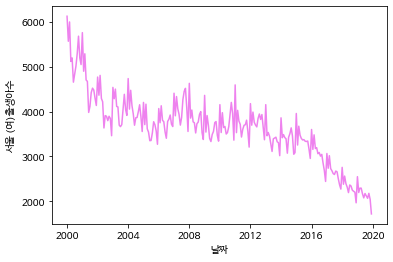

In [ ]:
#날짜별 서울 (여)출생아수
plt.plot(df1['날짜'], df1['서울특별시 여자(명)'], color='violet')
plt.xlabel('날짜')
plt.ylabel('서울 (여)출생아수')
plt.show()

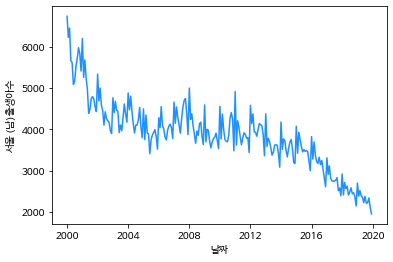

In [ ]:
#날짜별 서울 (남)출생아수
plt.plot(df1['날짜'], df1['서울특별시 남자(명)'], color='dodgerblue')
plt.xlabel('날짜')
plt.ylabel('서울 (남)출생아수')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   날짜                    240 non-null    datetime64[ns]
 1   아파트(서울)[2019.01=100]  240 non-null    float64       
 2   총지수(서울)[2019.01=100]  240 non-null    float64       
 3   서울특별시 계(명)            240 non-null    int64         
 4   서울특별시 남자(명)           240 non-null    int64         
 5   서울특별시 여자(명)           240 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 11.4 KB


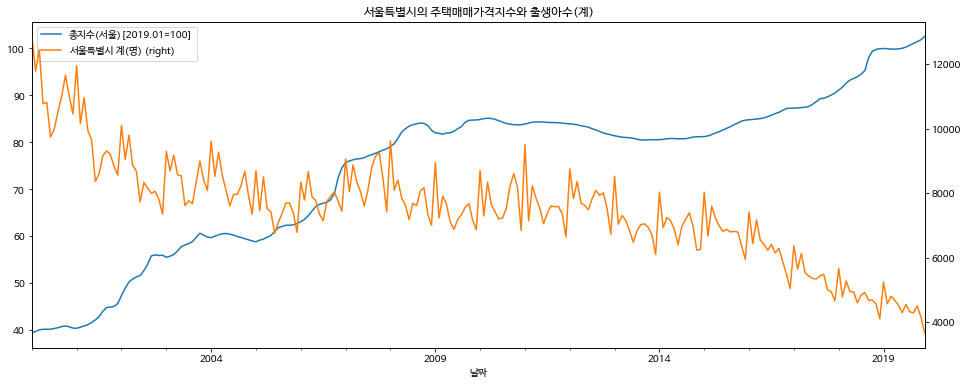

In [ ]:
# 서울특별시의 출생자수(계)와 주택 매매가격 지수 그래프 비교
ax = df1.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택매매가격지수와 출생아수(계)")
df1.plot('날짜', '서울특별시 계(명)', secondary_y=True, ax=ax)
plt.show()

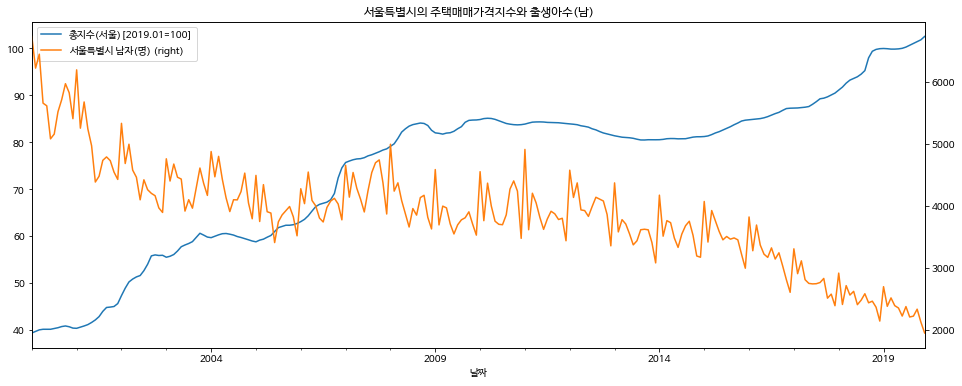

In [ ]:
# 서울특별시의 출생자수(남)와 주택 매매가격 지수 그래프 비교
ax = df1.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택매매가격지수와 출생아수(남)")
df1.plot('날짜', '서울특별시 남자(명)', secondary_y=True, ax=ax)
plt.show()

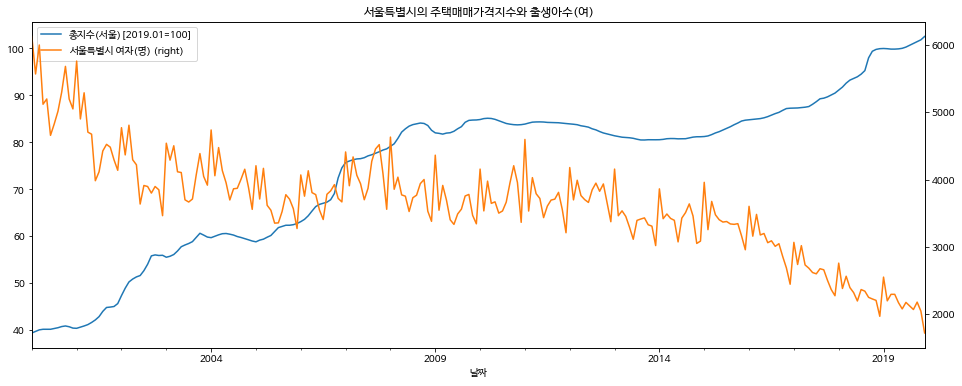

In [ ]:
# 서울특별시의 출생자수(여)와 주택 매매가격 지수 그래프 비교
ax = df1.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택매매가격지수와 출생아수(여)")
df1.plot('날짜', '서울특별시 여자(명)', secondary_y=True, ax=ax)
plt.show()

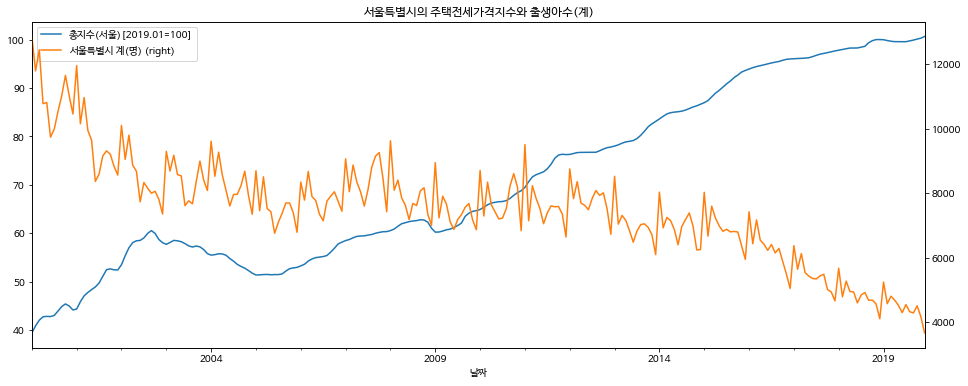

In [ ]:
# 서울특별시의 출생자수(계)와 주택 전세가격 지수 그래프 비교
ax = df2.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택전세가격지수와 출생아수(계)")
df2.plot('날짜', '서울특별시 계(명)', secondary_y=True, ax=ax)
plt.show()

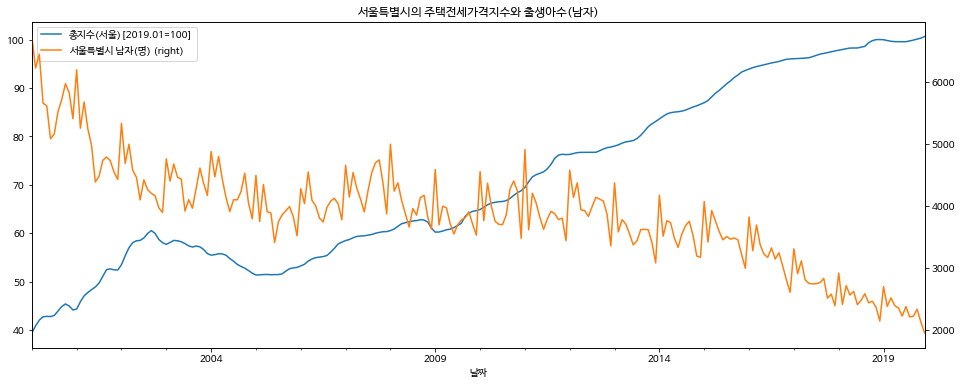

In [ ]:
# 서울특별시의 출생자수(계)와 주택 전세가격 지수 그래프 비교
ax = df2.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택전세가격지수와 출생아수(남자)")
df2.plot('날짜', '서울특별시 남자(명)', secondary_y=True, ax=ax)
plt.show()

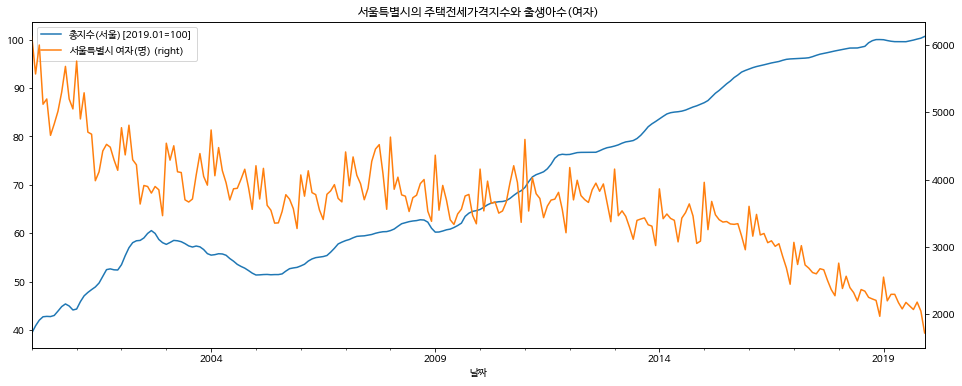

In [ ]:
# 서울특별시의 출생자수(계)와 주택 전세가격 지수 그래프 비교
ax = df2.plot('날짜', '총지수(서울)[2019.01=100]', figsize=(16, 6))
plt.title("서울특별시의 주택전세가격지수와 출생아수(여자)")
df2.plot('날짜', '서울특별시 여자(명)', secondary_y=True, ax=ax)
plt.show()